In [1]:
import numpy as np
import pyswarms as ps
import matplotlib.pyplot as plt

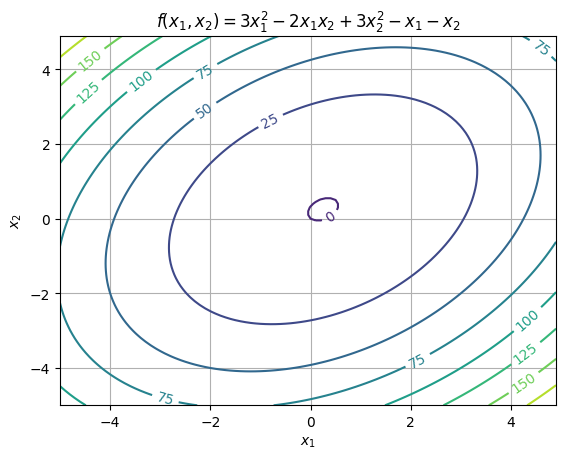

In [2]:
def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y

x = np.vstack((np.array([np.arange(-5,5,0.1)]),
               np.array([np.arange(-5,5,0.1)])))

X,Y = np.meshgrid(x[0], x[1])
Z = pers1(X,Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True)
ax.set_title('$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid()

In [3]:
# penentuan parameter

# fitness function

def calculate_fitness(x):
    output = pers1(x[:,0],x[:,1])

    return output

In [4]:
from pyswarms.single.global_best import GlobalBestPSO

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options=options)
cost, pos = optimizer.optimize(calculate_fitness, 20)

2024-03-06 06:44:47,527 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=-0.25
2024-03-06 06:44:47,550 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.2499434970023422, best pos: [0.24573551 0.25021225]


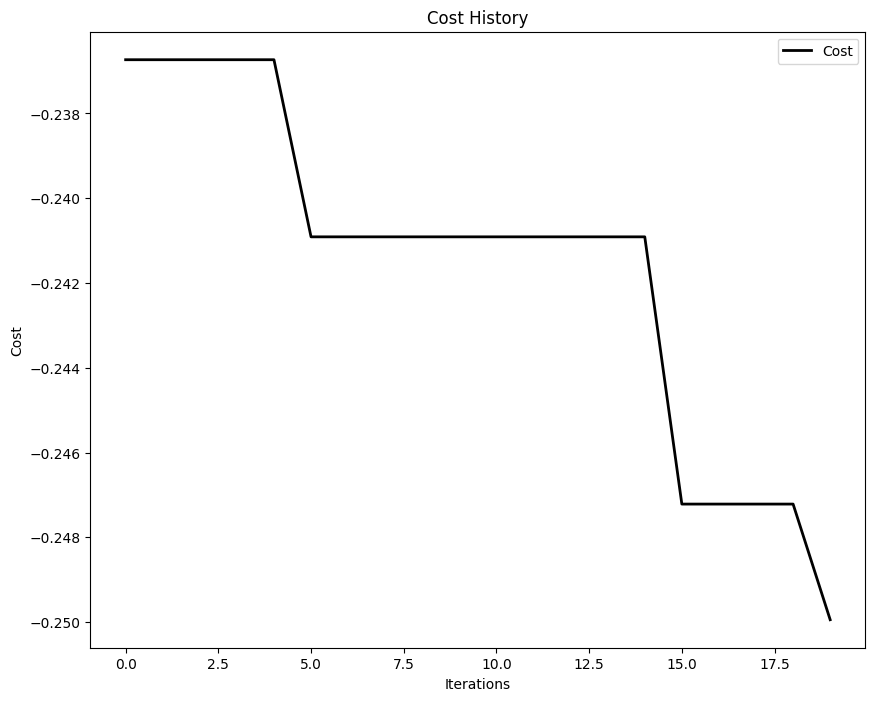

In [5]:
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

2024-03-06 06:46:23,974 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2024-03-06 06:46:23,975 - matplotlib.animation - INFO - MovieWriter._run: running command: convert -size 1000x800 -depth 8 -delay 10.0 -loop 0 rgba:- -layers OptimizePlus plot0.gif


NameError: name 'Image' is not defined

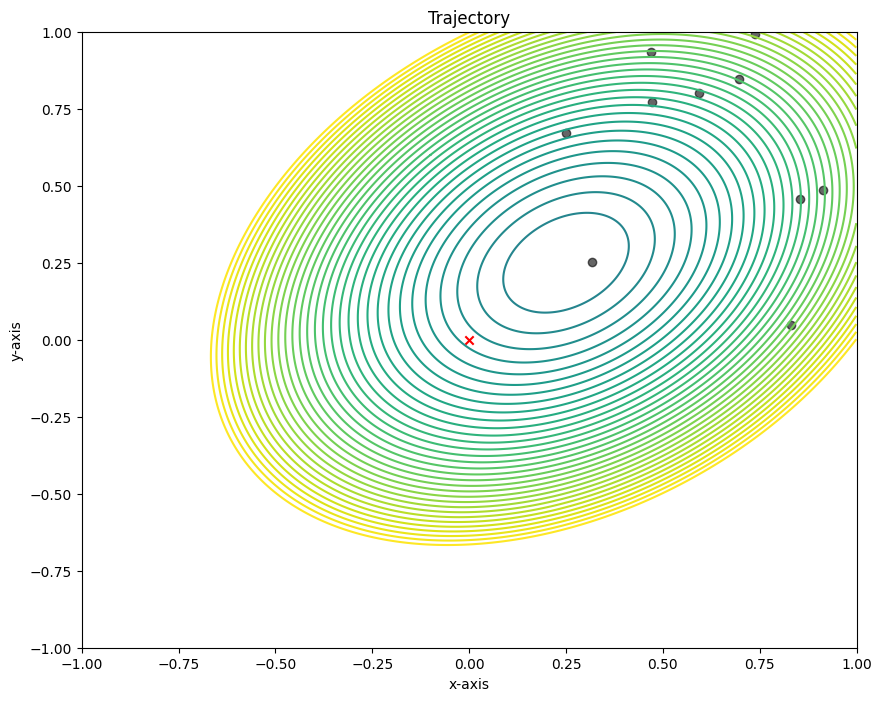

In [10]:
from pyswarms.utils.plotters.formatters import Mesher

# Initialize mesher with sphere function
m = Mesher(func=calculate_fitness)

#capture
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))


# Enables us to view it in a Jupyter notebook
animation.save('plot0.gif', writer='imagemagick', fps=10)
Image(url='plot0.gif')